In [6]:
%load_ext autoreload
%autoreload 1

import sys
HOME='/mnt/home/llorente/'
#HOME='/home/cj/'
sys.path.append(HOME+'comp_structure_research')
sys.path.append(HOME+'comp_structure_research/stellar_mass_fraction')
sys.path.append(HOME+'comp_structure_research/general_analysis')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import yt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Stellar Mass fraction analysis for the Big Box 25 Mpc simulation at z = 0, 1, & 2

In [8]:
%aimport HaloData
from HaloData import *

#dataset_fname  = "~/cosmo_bigbox/25Mpc_512/RD0265/RD0265"

hdfile_RD0111 = "halodata_RD0111.dat" # z = 2.00
hdfile_RD0166 = "halodata_RD0166.dat" # z = 1.00
hdfile_RD0265 = "halodata_RD0265.dat" # z = 0.00
hdfile_orig = "halodata_RD0265.dat.bkp" # z = 0.00

hd_RD0111 = HaloData.load_from_file(hdfile_RD0111).filter_by(Fields.TOT_MASS, greater_than, 1e10).filter_by(Fields.NUM_STAR_PARTICLES, greater_than, 10)
hd_RD0166 = HaloData.load_from_file(hdfile_RD0166).filter_by(Fields.TOT_MASS, greater_than, 1e10).filter_by(Fields.NUM_STAR_PARTICLES, greater_than, 10)
hd_RD0265 = HaloData.load_from_file(hdfile_RD0265).filter_by(Fields.TOT_MASS, greater_than, 1e10).filter_by(Fields.NUM_STAR_PARTICLES, greater_than, 10)


In [9]:
def DarkMatter(pfilter, data):
    filter = data[("all", "particle_type")] == 1 # DM = 1, Stars = 2
    return filter
    
yt.add_particle_filter("dark_matter", function=DarkMatter, filtered_type='all', \
                    requires=["particle_type"])

def stars(pfilter, data):
    filter = data[("all", "particle_type")] == 2 # DM = 1, Stars = 2
    return filter

yt.add_particle_filter("stars", function=stars, filtered_type='all', \
                       requires=["particle_type"])


yt : [WARNING  ] 2020-06-26 11:55:25,301 The dark_matter particle filter already exists. Overriding.
yt : [WARNING  ] 2020-06-26 11:55:25,302 The stars particle filter already exists. Overriding.


In [49]:
ts = yt.load(f'{HOME}/cosmo_bigbox/25Mpc_512/RD????/RD????')

storage = {}
for i in range(0):
    ts[i].add_particle_filter('stars')
    #ts[i].add_particle_filter('dark_matter')

ts[0].derived_field_list

yt : [INFO     ] 2020-06-26 13:42:40,732 Parameters: current_time              = 154.50086626384
yt : [INFO     ] 2020-06-26 13:42:40,733 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2020-06-26 13:42:40,734 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-26 13:42:40,736 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-26 13:42:40,737 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-26 13:42:40,738 Parameters: current_redshift          = 2.0039999729143
yt : [INFO     ] 2020-06-26 13:42:40,739 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2020-06-26 13:42:40,740 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2020-06-26 13:42:40,741 Parameters: hubble_constant           = 0.695
Parsing Hierarchy : 100%|██████████| 142694/142694 [00:12<00:00, 11378.96it/s]
yt : [INFO     ] 2020-06-26 13:42:58,954 Gathering a field list (this may take a moment.)
yt : [INFO    

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('al

In [51]:
print(ts)

In [45]:
ds_RD0265 = ts[2]
[print(df) for df in ds_RD0265.derived_field_list]




yt : [INFO     ] 2020-06-26 12:59:52,842 Parameters: current_time              = 639.44480440499
yt : [INFO     ] 2020-06-26 12:59:52,843 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2020-06-26 12:59:52,845 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-26 12:59:52,846 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-26 12:59:52,847 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-26 12:59:52,848 Parameters: current_redshift          = 0
yt : [INFO     ] 2020-06-26 12:59:52,849 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2020-06-26 12:59:52,850 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2020-06-26 12:59:52,850 Parameters: hubble_constant           = 0.695
Parsing Hierarchy : 100%|██████████| 163180/163180 [00:19<00:00, 8287.49it/s] 
yt : [INFO     ] 2020-06-26 13:00:28,956 Gathering a field list (this may take a moment.)


('all', 'age')
('all', 'creation_time')
('all', 'dynamical_time')
('all', 'mesh_id')
('all', 'metallicity_fraction')
('all', 'particle_angular_momentum')
('all', 'particle_angular_momentum_magnitude')
('all', 'particle_angular_momentum_x')
('all', 'particle_angular_momentum_y')
('all', 'particle_angular_momentum_z')
('all', 'particle_cylindrical_velocity_theta')
('all', 'particle_cylindrical_velocity_z')
('all', 'particle_index')
('all', 'particle_mass')
('all', 'particle_ones')
('all', 'particle_position')
('all', 'particle_position_cylindrical_radius')
('all', 'particle_position_cylindrical_theta')
('all', 'particle_position_cylindrical_z')
('all', 'particle_position_relative')
('all', 'particle_position_relative_x')
('all', 'particle_position_relative_y')
('all', 'particle_position_relative_z')
('all', 'particle_position_spherical_phi')
('all', 'particle_position_spherical_radius')
('all', 'particle_position_spherical_theta')
('all', 'particle_position_x')
('all', 'particle_position

# Stellar Mass Fraction for 25 Mpc Box at z = 0

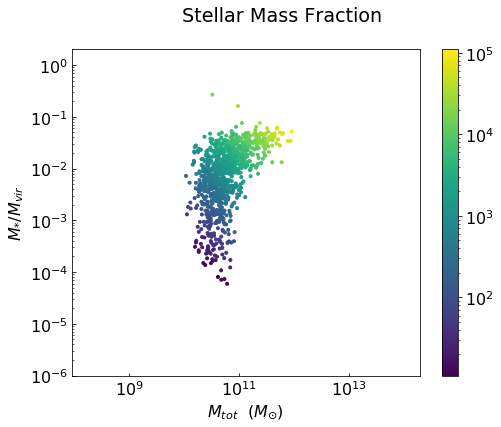

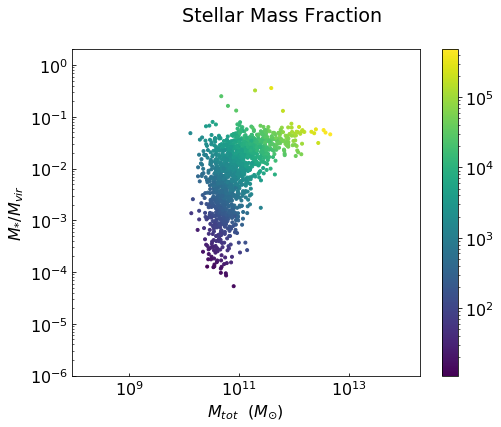

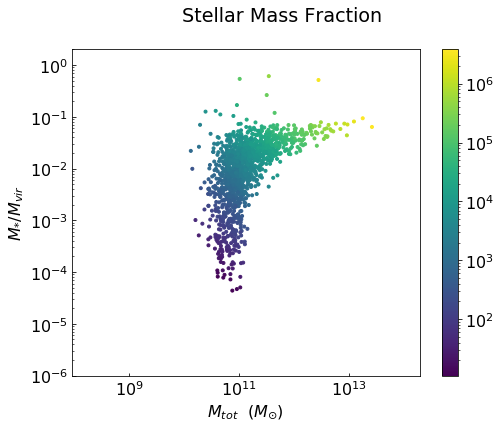

In [43]:

%aimport stellar_mass_fraction_plots
from stellar_mass_fraction_plots import *

stellar_mass_fraction_scatter(hd_RD0111)
stellar_mass_fraction_scatter(hd_RD0166)
stellar_mass_fraction_scatter(hd_RD0265)


Stellar Mass Fraction of each halo, plotted against their total mass. The color represents the total number of star particles in each halo. 



# Keeping track of rockstar datasets
There is a file in the rockstar_halos called `datasets.txt` which contains filename of the dataset used to create the catalog.



# Data Resolution
It should make sense that the star particle cutoff results in clean, diagonal cuts on the left side of the graph. It might help to plot the stellar mass vs halo mass with number of star particles as well next to this graph just to help me make sense of things. It might be worth looking into doing a vertical cut at ~$10^{10}$ stellar masses. The justification for this being that the mass resolution for these halos is low, thus the data are less trustworthy. Need to confirm this and come up with a formula to determine a proper cutoff mass. 



# Formula used to calculate stellar mass fraction:
$$
f = \frac{M_*}{\displaystyle \frac{\Omega_b}{\Omega_m} M_h}
$$

where
$M_*$ is total stellar mass in a halo

$\Omega_b$ is the cosmological baryon fraction

$\Omega_c$ is the cosmological (cold) dark matter fraction

$\Omega_m = \Omega_b + \Omega_c$

$M_h$ is the halo mass. Note: make sure we calculate halo mass the same way Behroozi does in Behroozi et al (2013)


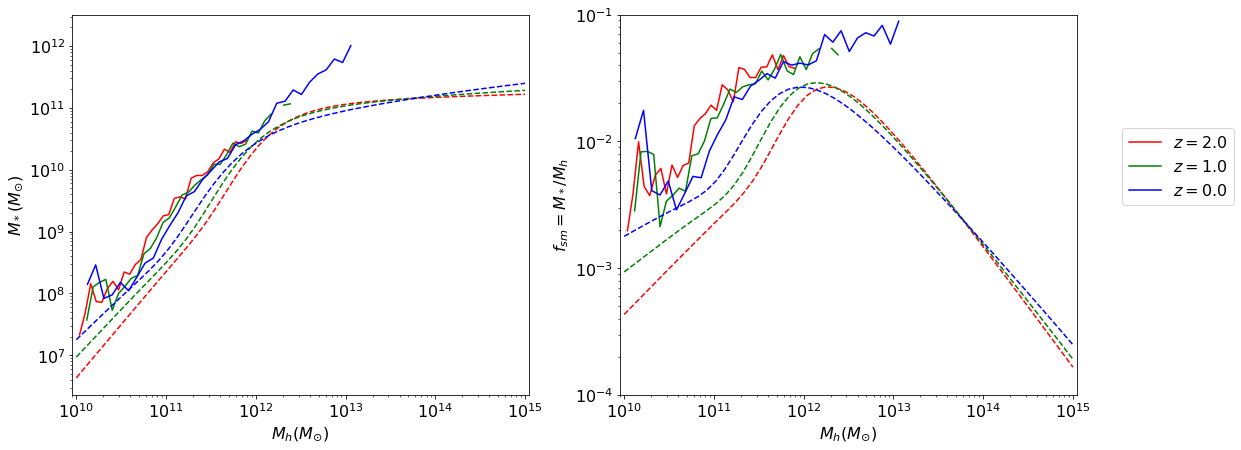

In [11]:
%aimport stellar_mass_fraction_plots
from stellar_mass_fraction_plots import *
stellar_mass_fraction_reduced([hd_RD0111, hd_RD0166, hd_RD0265], [2.0, 1.0, 0.0])

Median values for stellar mass and stellar mass fraction compared to Behroozi fit function at $z=0$. 


Seeing an interesting trend where stellar masses appear to be decreasing over time, in opposition to what we see from observation. 
    
The scale factor in Behroozi's paper is the cosmological scale factor given by
    $$
    a = \frac{1}{1+z}
    $$

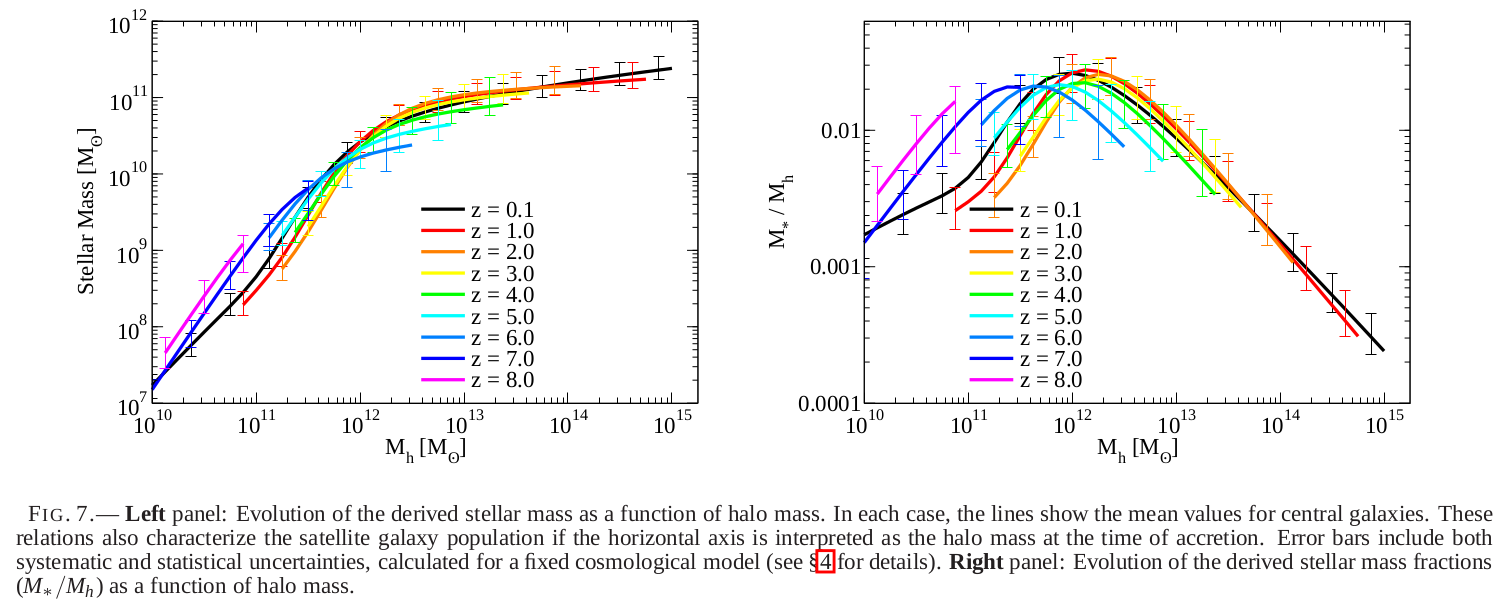

Behroozi describes his fit function as giving the *median* stellar mass for a given halo mass, but the caption in the image says that it gives the *mean* stellar mass. The data files themselves don't say one way or the other.

# TODO: Make Stellar Metallicity Plots

First practice calculating the mass-weighted stellar metallicity of a single halo at z = 0.
Then extend that to all halos at all redshifts.

# TODO: Make Cumuluative Number of Galaxies within mass bins (matter power spectrum)

# TODO: Update Behroozi fits from 2020 paper

# Stellar Metallicity Plots


In [12]:
%aimport stellar_mass_fraction_plots
from general_analysis_plots import *

#metallicity_reduced(hd)

NameError: name 'hd' is not defined

# TODO: Baryon Census

In [ ]:
%aimport stellar_mass_fraction_plots
from stellar_mass_fraction_plots import *

baryon_frac(hd, 0, min_nstar=10, min_halo_mass=1e10)

Peeples 2014 is an accounting of ISM gas and this selection includes all gas in the CGM, which is why the gas count appears so high. 

In [1]:
%aimport stellar_mass_fraction_plots
from stellar_mass_fraction_plots import *

hist_2d(hd, 0, min_nstar=10, min_halo_mass=1e10)

UsageError: Line magic function `%aimport` not found.
